In [1]:
import pandas as pd
import numpy as np

In [134]:
train = pd.read_csv("train_LZdllcl.csv")
test = pd.read_csv("test_2umaH9m.csv")

In [135]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [136]:
train.head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [137]:
train['no_of_trainings'].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9])

In [138]:
train['previous_year_rating']=train['previous_year_rating'].astype('category')

In [139]:
train.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [140]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [141]:
from fastai.imports import*

In [142]:
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [143]:
train_cats(train)
apply_cats(test,train)

In [144]:
df,y,nan=proc_df(train,'is_promoted')
test,_,_=proc_df(test)

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
m=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
# df=df.drop(['employee_id'],axis=1/)

In [149]:
# test=test.drop(['employee_id'],axis=1)

In [150]:
# test=test.drop(['previous_year_rating_na'],axis=1)

In [151]:
test.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,9,19,1,2,3,1,24,0,1,1,0,77
1,74430,3,29,1,1,1,1,31,3,5,0,0,51
2,72255,8,5,1,2,1,1,31,1,4,0,0,47
3,38562,6,12,1,1,1,3,31,2,9,0,0,65
4,64486,2,22,1,2,3,1,30,4,7,0,0,61


In [161]:
x_tr,x_te,y_tr,y_te=train_test_split(df,y,test_size=0.2)

In [162]:
m.fit(x_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [163]:
m.score(x_te,y_te)

0.9370552818828681

In [164]:
yp=m.predict(test)

In [165]:
sample=pd.read_csv('sample_submission_M0L0uXE.csv')

In [166]:
test.shape

(23490, 13)

In [219]:
sample['is_promoted']=l1

In [220]:
sample.to_csv('subm1.csv',index=False)

In [221]:
sample.head(50)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
5,46232,0
6,54542,0
7,67269,0
8,66174,0
9,76303,0


In [194]:
sample

SyntaxError: invalid syntax (<ipython-input-194-9ee7936fa7c5>, line 1)

In [169]:
fi = rf_feat_importance(m, df); 
fi[:10]

,cols,imp
12,avg_training_score,0.246165
0,employee_id,0.173043
7,age,0.107301
2,region,0.092659
1,department,0.086906
9,length_of_service,0.080572
8,previous_year_rating,0.049947
10,KPIs_met >80%,0.046813
11,awards_won?,0.030821
5,recruitment_channel,0.025841


In [115]:
df.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,5.972796,16.428970,1.515363,1.702379,1.868158,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750
std,2.506046,8.764954,0.939316,0.457216,0.980713,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000
25%,5.000000,12.000000,1.000000,1.000000,1.000000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000
50%,6.000000,15.000000,1.000000,2.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,8.000000,22.000000,3.000000,2.000000,3.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,9.000000,34.000000,3.000000,2.000000,3.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [152]:
for i in df.columns:
    if df[i].dtype=='int8':
        df[i]=df[i].astype('category')

In [186]:
df['employee_id']=df['employee_id'].astype('category')

In [160]:
test['employee_id']=test['employee_id'].astype('category')

In [183]:
for i in df.columns:
    if test[i].dtype=='int8':
        test[i]=test[i].astype('category')

In [171]:
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [207]:
import lightgbm as lgb 
import xgboost as xgb

def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "multiclass",
        "num_class":2,
        "metric":None,
        "num_leaves" : 10,
        "learning_rate" : 0.008,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
#                       feval=lgb_f1_score,
                      verbose_eval=150, 
                      evals_result=evals_result)
    
    pred_test_y =model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [208]:
pred_test, model, evals_result = run_lgb(x_tr,y_tr,x_te,y_te,test)
print("LightGBM Training Completed...")

/home/sourav/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:685: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[150]	training's multi_logloss: 0.31562	valid_1's multi_logloss: 0.309589
[300]	training's multi_logloss: 0.234385	valid_1's multi_logloss: 0.227186
[450]	training's multi_logloss: 0.202868	valid_1's multi_logloss: 0.195916
[600]	training's multi_logloss: 0.186104	valid_1's multi_logloss: 0.17986
[750]	training's multi_logloss: 0.176852	valid_1's multi_logloss: 0.171493
[900]	training's multi_logloss: 0.170978	valid_1's multi_logloss: 0.166594
[1050]	training's multi_logloss: 0.166605	valid_1's multi_logloss: 0.163121
[1200]	training's multi_logloss: 0.164013	valid_1's multi_logloss: 0.161352
[1350]	training's multi_logloss: 0.161717	valid_1's multi_logloss: 0.159946
[1500]	training's multi_logloss: 0.160064	valid_1's multi_logloss: 0.159088
[1650]	training's multi_logloss: 0.158463	valid_1's multi_logloss: 0.15827
[1800]	training's multi_logloss: 0.157254	valid_1's multi_logloss: 0.157814
[1950]	training's multi_logloss: 0

In [214]:
np.argmax(pred_test,axis=0)

array([14180,  4480])

In [215]:
l1 = []
for i in range(len(pred_test)):
    l1.append(np.argmax(pred_test[i]))



In [216]:
l1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


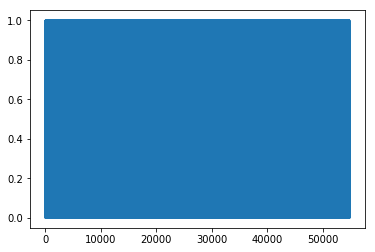

In [217]:
train['is_promoted'].plot()

/home/sourav/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


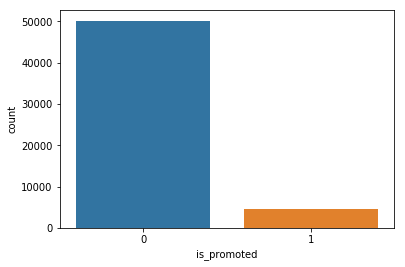

In [218]:
sns.countplot(train['is_promoted'])